<a href="https://colab.research.google.com/github/Alton01/VGG_Pytorch_Project_Food_Classification/blob/main/VGG_Arch_food_project_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# VGG Computer vision with PyTorch

# 4 different classes of food.
# Sushi
# Cup Cakes
# Macarons
# Chocolate cake

In [2]:

import torch
from torch import nn


In [3]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [4]:
# FOR GETTING DATA

import requests # for making requests over internet
import zipfile # for unzipping zipped files
from pathlib import Path
import os


# set up data path

data_path = Path("data/")
image_path = data_path / "food_images"

# if image folder doesn't exist, download it and prepare it...

if image_path.is_dir():
  print(f"{image_path} directory already exists. Skipping download...")
else:
  print(f"Image path - {image_path} does not exist. Creating one.....")
  image_path.mkdir(parents=True, exist_ok=True)

# Download the data zip file and  writing it to data path
with open(data_path / "food_images.zip", "wb") as f:
  request = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/image_classification_dataset.zip")
  print(f"Downloading the food images data....")
  f.write(request.content)

# Unzip the data
with zipfile.ZipFile(data_path / "food_images.zip", "r") as zip_ref:
  print(f"Unzipping the food images data....")
  zip_ref.extractall(image_path)

Image path - data/food_images does not exist. Creating one.....
Unzipping the food images data....


In [5]:
# Remove the zip folder
os.remove("/content/data/food_images.zip")

In [6]:
# our dataset is in Standard Image Classification Format
# data -> food_images -> dataset -> train -> chocolate_cake, cup_cake -> macarons -> sushi
# data -> food_images -> dataset -> test -> chocolate_cake, cup_cake -> macarons -> sushi



In [7]:
# Setup Directory Paths

train_dir = image_path / "dataset/train"
test_dir = image_path / "dataset/test"

train_dir, test_dir

(PosixPath('data/food_images/dataset/train'),
 PosixPath('data/food_images/dataset/test'))

In [8]:
# Data preparation and exploration

import os

def walk_through_dir(dir_path):
  # for walking through directory path
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 1 directories and 0 images in 'data/food_images'.
There are 2 directories and 0 images in 'data/food_images/dataset'.
There are 4 directories and 0 images in 'data/food_images/dataset/test'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/cup_cakes'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/chocolate_cake'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/macarons'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/sushi'.
There are 4 directories and 0 images in 'data/food_images/dataset/train'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/cup_cakes'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/chocolate_cake'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/macarons'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/sushi'.


In [9]:
train_dir

PosixPath('data/food_images/dataset/train')

In [10]:
test_dir

PosixPath('data/food_images/dataset/test')

Random Image Path: data/food_images/dataset/train/chocolate_cake/3645406.jpg
Image class: chocolate_cake
Image height: 512
Image width: 512


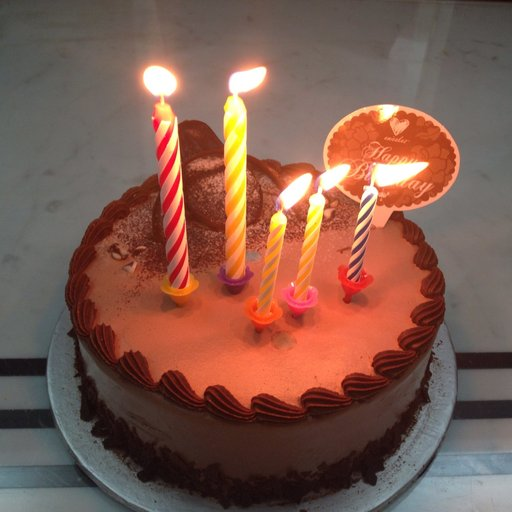

In [11]:
#data visualization
# Get images
# PIL is a library in python. Python Image Library

import random
from PIL import Image

# Get all image paths
image_path_list = list(image_path.glob("*/*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path ( image class isthe name of the directory where the image is stored)
# (like sushi, macarons, cup_cake)
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

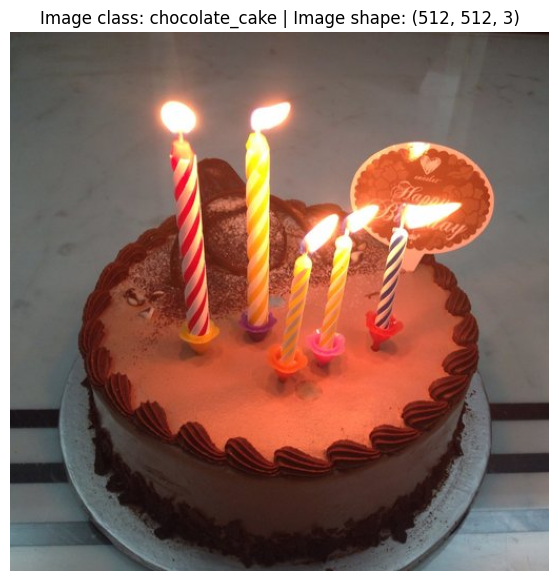

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
# convert image from PIL into numpy array

img_as_array = np.asarray(img)

#Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)


array([[[ 64,  59,  56],
        [ 65,  60,  57],
        [ 66,  61,  58],
        ...,
        [ 25,  10,   7],
        [ 25,  10,   7],
        [ 26,  11,   8]],

       [[ 66,  61,  58],
        [ 67,  62,  59],
        [ 68,  63,  60],
        ...,
        [ 33,  19,  16],
        [ 33,  18,  15],
        [ 32,  18,  15]],

       [[ 68,  64,  61],
        [ 68,  64,  61],
        [ 69,  65,  62],
        ...,
        [ 44,  33,  29],
        [ 46,  32,  29],
        [ 43,  32,  28]],

       ...,

       [[141, 151, 152],
        [141, 151, 152],
        [140, 150, 151],
        ...,
        [163, 163, 165],
        [163, 163, 165],
        [163, 163, 165]],

       [[141, 151, 152],
        [141, 151, 152],
        [140, 150, 151],
        ...,
        [164, 164, 164],
        [163, 163, 163],
        [163, 163, 163]],

       [[141, 151, 152],
        [140, 150, 151],
        [140, 150, 151],
        ...,
        [164, 164, 164],
        [163, 163, 163],
        [162, 162, 162]]], dtype=uint8)
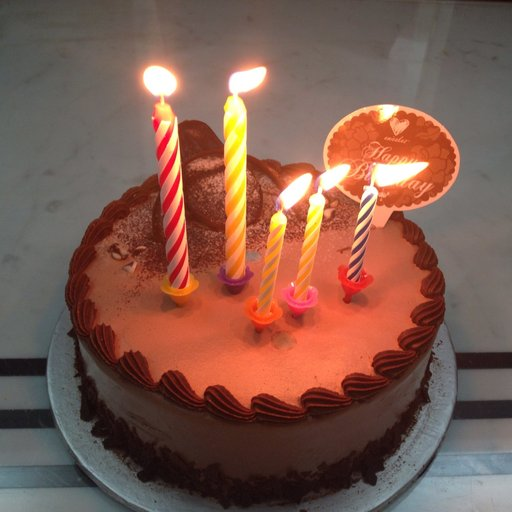

In [13]:
img_as_array

In [14]:
# Data TRANSFORMATION per image
# Turn target data into tensors (numerical representation of images)

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [15]:
## Transforming Data With Torchvision.transforms

data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # Flip images 50% of the time
    transforms.ToTensor()
])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

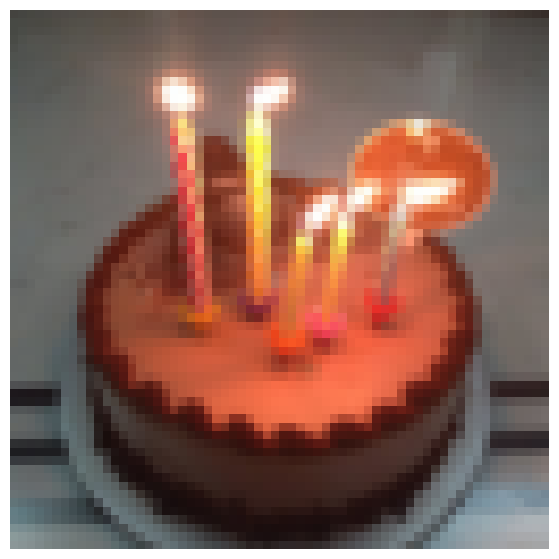

In [16]:
plt.figure(figsize=(10,7))
plt.imshow(data_transform(img).permute(1,2,0))
plt.axis(False)

In [17]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [18]:
data_transform(img)

tensor([[[0.2667, 0.2706, 0.2784,  ..., 0.2314, 0.2235, 0.2118],
         [0.2784, 0.2824, 0.2902,  ..., 0.2745, 0.2667, 0.2627],
         [0.2784, 0.2902, 0.3020,  ..., 0.2941, 0.2863, 0.2824],
         ...,
         [0.4824, 0.4745, 0.4627,  ..., 0.6784, 0.6824, 0.6784],
         [0.5412, 0.5294, 0.5176,  ..., 0.6588, 0.6627, 0.6627],
         [0.5451, 0.5333, 0.5216,  ..., 0.6392, 0.6431, 0.6431]],

        [[0.2627, 0.2706, 0.2784,  ..., 0.2000, 0.1882, 0.1765],
         [0.2863, 0.2863, 0.2863,  ..., 0.2588, 0.2510, 0.2471],
         [0.2863, 0.2980, 0.2980,  ..., 0.2784, 0.2706, 0.2667],
         ...,
         [0.5608, 0.5490, 0.5373,  ..., 0.6941, 0.6980, 0.6941],
         [0.6039, 0.5882, 0.5725,  ..., 0.6627, 0.6706, 0.6745],
         [0.5922, 0.5804, 0.5647,  ..., 0.6392, 0.6471, 0.6471]],

        [[0.2471, 0.2549, 0.2549,  ..., 0.1804, 0.1725, 0.1608],
         [0.2667, 0.2667, 0.2667,  ..., 0.2431, 0.2353, 0.2314],
         [0.2667, 0.2784, 0.2784,  ..., 0.2667, 0.2588, 0.

In [19]:
## Function to show the difference between the original and transformed image from a path for 3 images

def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n) # states number of images to sample.

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot image
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


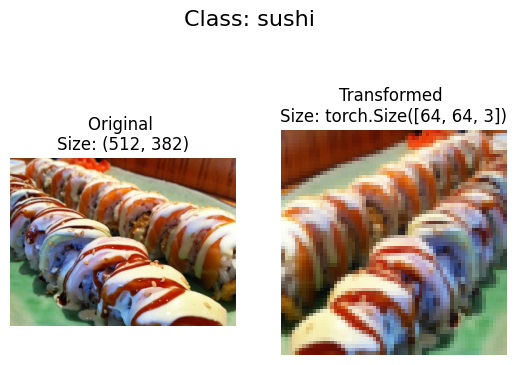

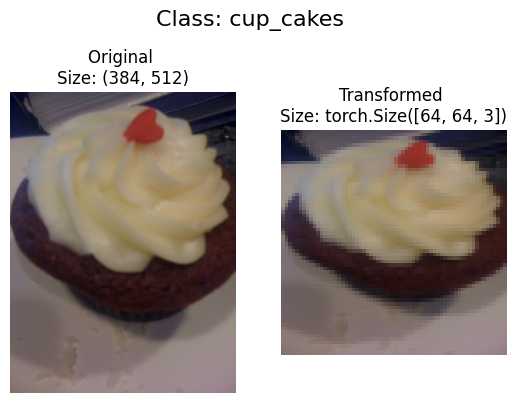

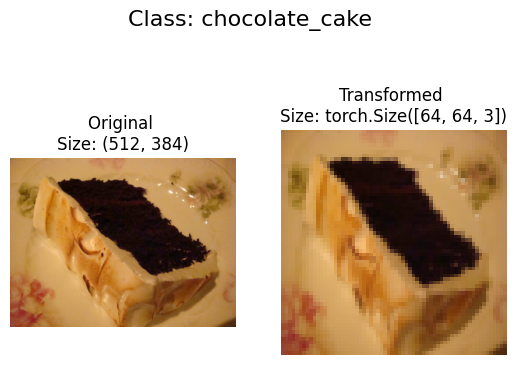

In [20]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=None)

In [21]:
# Loading image data using image folder
# Use imagefolder class to create datasets
# Apply transformation to whole datasets

from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                    transform=data_transform,
                                    target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                    transform=data_transform,
                                    target_transform=None)

In [22]:
train_data

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: data/food_images/dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [23]:
test_data

Dataset ImageFolder
    Number of datapoints: 300
    Root location: data/food_images/dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [24]:
train_data[0]

(tensor([[[0.1961, 0.4510, 0.9020,  ..., 0.9647, 0.9647, 0.9647],
          [0.3176, 0.7569, 0.9608,  ..., 0.9647, 0.9647, 0.9647],
          [0.6471, 0.9412, 0.9686,  ..., 0.9647, 0.9647, 0.9647],
          ...,
          [0.1098, 0.1137, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
          [0.1059, 0.1059, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
          [0.0980, 0.1020, 0.1176,  ..., 0.9647, 0.9647, 0.9647]],
 
         [[0.1961, 0.4627, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
          [0.3216, 0.7647, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
          [0.6471, 0.9451, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.1020, 0.1137, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
          [0.1020, 0.1020, 0.1137,  ..., 1.0000, 1.0000, 1.0000],
          [0.0941, 0.0980, 0.1176,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.2314, 0.4824, 0.8863,  ..., 0.9882, 0.9882, 0.9882],
          [0.3412, 0.7490, 0.9255,  ..., 0.9882, 0.9882, 0.9882],
          [0.6510, 0.9098, 0.9216,  ...,

In [25]:
# Get class names as list

class_names = train_data.classes
class_names

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [26]:
# Get class names as dict
# class_to_idx : this attributes will give us a dictionary of the classes mapped to indexes

class_dict = train_data.class_to_idx
class_dict

{'chocolate_cake': 0, 'cup_cakes': 1, 'macarons': 2, 'sushi': 3}

In [27]:
# Check the length of our datasets
len(train_data), len(test_data)

(1000, 300)

In [28]:
# Get a sample image and label from the training data
image, label = train_data[0]

print(f"Image tensor:\n {image}")
print(f"Image shape: {image.shape}")
print(f"Image datatype: {image.dtype}")
print(f"Image label: {label}")
print(f"Label Datatype: {type(label)}")

Image tensor:
 tensor([[[0.9647, 0.9647, 0.9647,  ..., 0.9020, 0.4510, 0.1961],
         [0.9647, 0.9647, 0.9647,  ..., 0.9608, 0.7569, 0.3176],
         [0.9647, 0.9647, 0.9647,  ..., 0.9686, 0.9412, 0.6471],
         ...,
         [0.9647, 0.9647, 0.9647,  ..., 0.1098, 0.1137, 0.1098],
         [0.9647, 0.9647, 0.9647,  ..., 0.1098, 0.1059, 0.1059],
         [0.9647, 0.9647, 0.9647,  ..., 0.1176, 0.1020, 0.0980]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9020, 0.4627, 0.1961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9647, 0.7647, 0.3216],
         [1.0000, 1.0000, 1.0000,  ..., 0.9686, 0.9451, 0.6471],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.1176, 0.1137, 0.1020],
         [1.0000, 1.0000, 1.0000,  ..., 0.1137, 0.1020, 0.1020],
         [1.0000, 1.0000, 1.0000,  ..., 0.1176, 0.0980, 0.0941]],

        [[0.9882, 0.9882, 0.9882,  ..., 0.8863, 0.4824, 0.2314],
         [0.9882, 0.9882, 0.9882,  ..., 0.9255, 0.7490, 0.3412],
         [0.9882, 0.9882, 0.9804,  ..., 0.9

In [29]:
class_names[label]

'chocolate_cake'

Original image shape: torch.Size([3, 64, 64]) -> [C, H, W]
Image permuted shape: torch.Size([64, 64, 3]) -> [H, W, C]


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

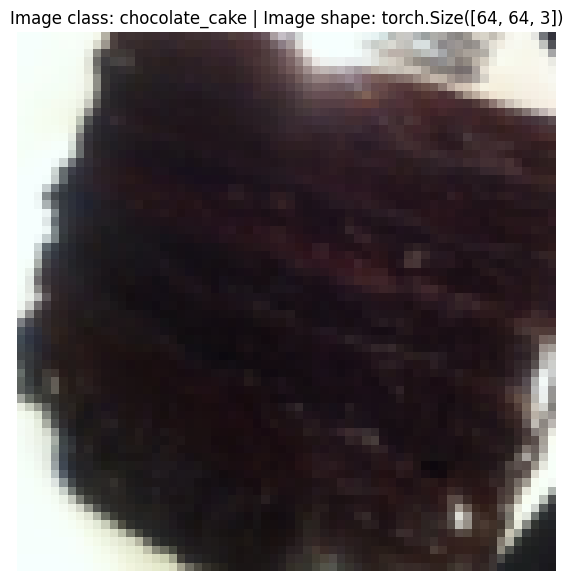

In [30]:
# For rearranging the order of dimensions
# In order to visualize image in a matplotlib, we have to rearrange dimensions by permuting it
# Pytorch prefers colour channels first as [C, H, W]
# MatPlotLib prefers colour channels last as [H, W, C]

img_permute = image.permute(1,2,0)

# Print out different shapes
print(f"Original image shape: {image.shape} -> [C, H, W]")
print(f"Image permuted shape: {img_permute.shape} -> [H, W, C]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]} | Image shape: {img_permute.shape}")
plt.axis(False)

In [31]:
# Turn loaded images into dataloaders
# num_workers=1: Specifies the number of subprocesses to use for data loading.
# A higher number can speed up loading but might consume more memory.

from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUM_WORKERS)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b0f1288fd10>,
 <torch.utils.data.dataloader.DataLoader at 0x7b0f12641610>)

In [32]:
# For getting batch image and label shape of train data loader
img_batch, label_batch = next(iter(train_dataloader))

len(img_batch), len(label_batch)

print(f"Image shape: {img_batch.shape} -> [Batch Size, Color Channels, Height, Width]")
print(f"Label shape: {label_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [Batch Size, Color Channels, Height, Width]
Label shape: torch.Size([32])


In [33]:
# For getting batch image and label shape of test data loader
test_image_batch, test_label_batch = next(iter(test_dataloader))

len(test_image_batch), len(test_label_batch)

print(f"Image shape: {test_image_batch.shape} -> [Batch Size, Color Channels, Height, Width]")
print(f"Label shape: {test_label_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [Batch Size, Color Channels, Height, Width]
Label shape: torch.Size([32])


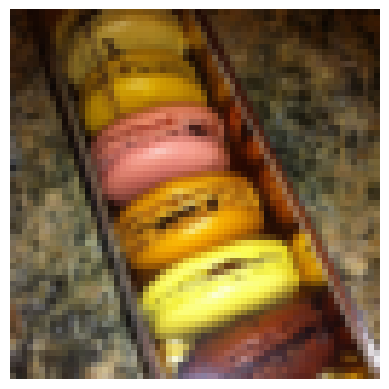

In [34]:
plt.imshow(img_batch[0].permute(1,2,0))
plt.axis(False)
plt.show()

In [35]:
from typing import List, Tuple, Dict

In [36]:
# Display random images

def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # Adjust display if n is greater than 10

  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10. Resetting to 10 and removing shape display")

  # Set the seed

  if seed:
    random.seed(seed)

  # Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)

  # Set up pyplot
  plt.figure(figsize=(16,8))

  #Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_sample_idx):
    targ_sample, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #Adjust tensor dimensions for plotting
    targ_image_adjust = targ_sample.permute(1, 2, 0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

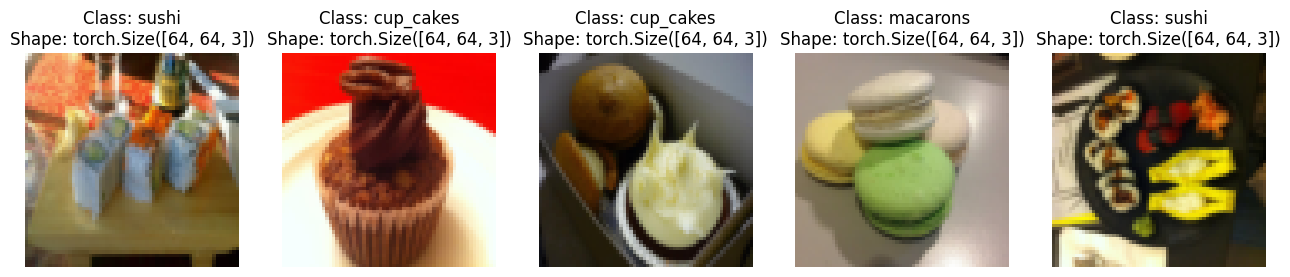

In [37]:
# plot random images

display_random_images(dataset=train_data,
                      classes=class_names,
                      n=5,
                      seed=None)

In [38]:
# Building a computer vision model - image classification model (Tiny VGG Architecture)

class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:

    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(), # learns complex non-liear relationships
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)
    )


    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # torchinfo can  be used for this calculation
                  out_features=output_shape)
    )


  def forward(self, x: torch.Tensor):
    # x = self.conv_block_1(x)
    print(f"self.conv_block_1 shape of x is {x.shape}")
    # x = self.conv_block_2(x)
    print(f"self.conv_block_2 shape of x is {x.shape}")
    # x = self.classifier(x)
    print(f"self.classifier shape of x is {x.shape}")
    return x

In [39]:
torch.manual_seed(42)
model = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

In [40]:
# Try a dummy forward pass by passing a single image.

image_batch, label_batch = next(iter(train_dataloader))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [41]:
# Implement a dummy forward pass needed for calculating shape to be sent to nn.Linear in self.classifier

model(image_batch.to(device))

self.conv_block_1 shape of x is torch.Size([32, 3, 64, 64])
self.conv_block_2 shape of x is torch.Size([32, 3, 64, 64])
self.classifier shape of x is torch.Size([32, 3, 64, 64])


tensor([[[[0.3843, 0.3843, 0.3922,  ..., 0.8118, 0.8902, 0.8627],
          [0.4314, 0.4588, 0.5373,  ..., 0.7490, 0.8392, 0.8392],
          [0.6549, 0.7608, 0.8392,  ..., 0.6980, 0.7412, 0.7725],
          ...,
          [0.1294, 0.1176, 0.1176,  ..., 0.3608, 0.3843, 0.3882],
          [0.1922, 0.1373, 0.1255,  ..., 0.3529, 0.3804, 0.3725],
          [0.2980, 0.2078, 0.1843,  ..., 0.3765, 0.3804, 0.4000]],

         [[0.4000, 0.4078, 0.4118,  ..., 0.4863, 0.6039, 0.5843],
          [0.4353, 0.4471, 0.4745,  ..., 0.4235, 0.5412, 0.5569],
          [0.5529, 0.6157, 0.6627,  ..., 0.3882, 0.4431, 0.4941],
          ...,
          [0.1176, 0.1059, 0.1098,  ..., 0.3451, 0.3725, 0.3725],
          [0.1843, 0.1255, 0.1176,  ..., 0.3373, 0.3647, 0.3569],
          [0.2941, 0.1961, 0.1686,  ..., 0.3529, 0.3569, 0.3922]],

         [[0.4039, 0.4157, 0.4157,  ..., 0.5137, 0.6157, 0.5961],
          [0.4235, 0.4275, 0.4510,  ..., 0.4549, 0.5608, 0.5686],
          [0.5098, 0.5529, 0.5882,  ..., 0

In [42]:
# Implement a dummy forward pass needed for calculating shape to be sent to nn.Linear in self.classifier

model(image_batch[0].unsqueeze(0).to(device))

self.conv_block_1 shape of x is torch.Size([1, 3, 64, 64])
self.conv_block_2 shape of x is torch.Size([1, 3, 64, 64])
self.classifier shape of x is torch.Size([1, 3, 64, 64])


tensor([[[[0.3843, 0.3843, 0.3922,  ..., 0.8118, 0.8902, 0.8627],
          [0.4314, 0.4588, 0.5373,  ..., 0.7490, 0.8392, 0.8392],
          [0.6549, 0.7608, 0.8392,  ..., 0.6980, 0.7412, 0.7725],
          ...,
          [0.1294, 0.1176, 0.1176,  ..., 0.3608, 0.3843, 0.3882],
          [0.1922, 0.1373, 0.1255,  ..., 0.3529, 0.3804, 0.3725],
          [0.2980, 0.2078, 0.1843,  ..., 0.3765, 0.3804, 0.4000]],

         [[0.4000, 0.4078, 0.4118,  ..., 0.4863, 0.6039, 0.5843],
          [0.4353, 0.4471, 0.4745,  ..., 0.4235, 0.5412, 0.5569],
          [0.5529, 0.6157, 0.6627,  ..., 0.3882, 0.4431, 0.4941],
          ...,
          [0.1176, 0.1059, 0.1098,  ..., 0.3451, 0.3725, 0.3725],
          [0.1843, 0.1255, 0.1176,  ..., 0.3373, 0.3647, 0.3569],
          [0.2941, 0.1961, 0.1686,  ..., 0.3529, 0.3569, 0.3922]],

         [[0.4039, 0.4157, 0.4157,  ..., 0.5137, 0.6157, 0.5961],
          [0.4235, 0.4275, 0.4510,  ..., 0.4549, 0.5608, 0.5686],
          [0.5098, 0.5529, 0.5882,  ..., 0

In [43]:
### Use torchinfo to get an idea of the summary of the shapes going through the model

try:
  import torchinfo
except:
  !pip install -q torchinfo
  import torchinfo

In [44]:
from torchinfo import summary

summary(model=model,
        input_size=[1, 3, 64, 64])


self.conv_block_1 shape of x is torch.Size([1, 3, 64, 64])
self.conv_block_2 shape of x is torch.Size([1, 3, 64, 64])
self.classifier shape of x is torch.Size([1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3, 64, 64]            9,774
Total params: 9,774
Trainable params: 9,774
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.05
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.05

In [46]:
# Creation of training and testing loop

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X) #outputs raw logits

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Calculate accuracy metrics

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Calculate average loss and accuracy
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc


In [47]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

  model.eval()

  test_loss, test_acc = 0, 0


  with torch.inference_mode():

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Get average loss  and accuracy
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc